In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

Dataset & processing

In [3]:
# load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
# print the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# the shape of dataset
df.shape

(891, 12)

In [6]:
# some info and statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# check the number of missing value for each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the misiing values

In [10]:
# here we are gonna drop the Cabin column
df2 = df.drop(columns="Cabin", axis = 1)

In [11]:
# replce the missing values in age column with mean value
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

In [12]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df2['Nickname'] = df2['Name'].apply(lambda x:x.split()[1][:-1])
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Nickname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


In [14]:
def time_period(x):
    if x <= 17:
        return 'young'
    elif x <= 45:
        return 'Adult'
    else:
        return 'old'

df2['Age_stage'] = df2['Age'].apply(time_period)
df2['Age_stage']

0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
       ...  
886    Adult
887    Adult
888    Adult
889    Adult
890    Adult
Name: Age_stage, Length: 891, dtype: object

In [15]:
# feature engineering and preprocessing
df2['t_family'] = df2['Parch'] + df2['SibSp']
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Nickname,Age_stage,t_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev,Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss,Adult,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Miss,Adult,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr,Adult,0


In [16]:
df2['Fare_group'] = pd.qcut(df2['Fare'],4,labels=False)

In [17]:
# fill the missing values in "Embarked" column
df2['Embarked'] = df2['Embarked'].fillna(df2['Embarked'].mode()[0])

In [18]:
# some EDA
df2.shape[0]

891

In [19]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Nickname', 'Age_stage',
       't_family', 'Fare_group'],
      dtype='object')

In [20]:
# How many people had survived
df2[df['Survived'] == 1].shape[0]

342

In [21]:
# How many people hadn't survived
df2[df['Survived'] == 0].shape[0]

549

<Axes: xlabel='Survived', ylabel='count'>

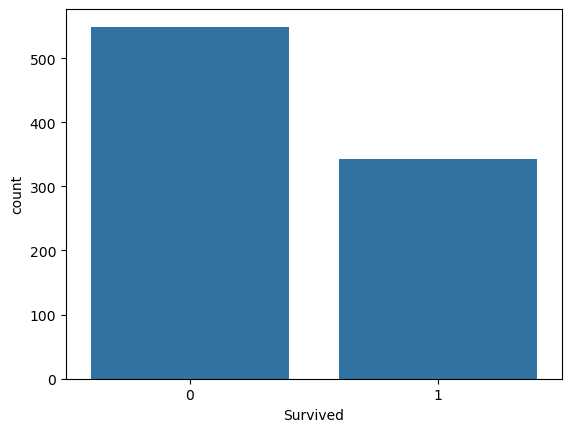

In [22]:
# Survived countplot
sns.countplot(x=df2['Survived'])

In [23]:
# class categories
df2['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [24]:
# which category is the most
df2['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [25]:
# does the Pclass afecct the chance of survivng
for i in [1,2,3]:
    print(f"class {i} --> {round((((df2[(df2['Pclass'] == i) & (df2['Survived'] == 0)].shape[0]) / df2.shape[0]) * 100))}%")


class 1 --> 9%
class 2 --> 11%
class 3 --> 42%


<Axes: xlabel='Pclass', ylabel='count'>

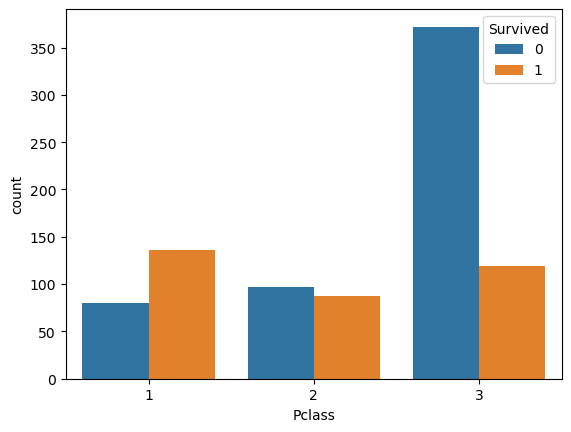

In [26]:
sns.countplot(data= df2, x= "Pclass",hue= 'Survived')

In [27]:
# are the Pclass and Fare realted
for i in[1,2,3]:
    print(f"avg_fare_for_class:{i} = {df2[df['Pclass'] == i]['Fare'].mean()}")


avg_fare_for_class:1 = 84.1546875
avg_fare_for_class:2 = 20.662183152173913
avg_fare_for_class:3 = 13.675550101832993


<Axes: xlabel='Pclass', ylabel='Fare'>

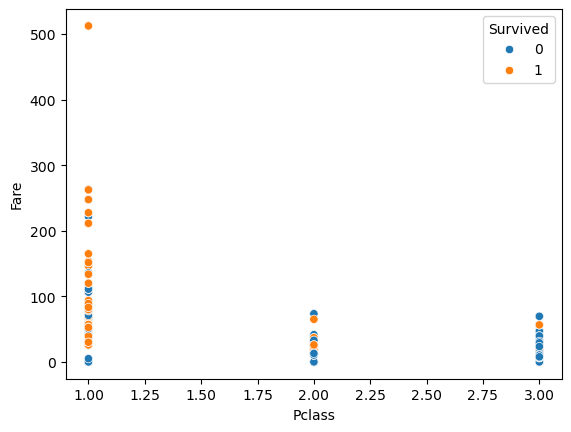

In [28]:
sns.scatterplot(data=df2, x="Pclass",y ='Fare',hue="Survived")

In [29]:
# is the Gender has any effects on the Pclass
df2.loc[df2['Pclass'] == 1]['Sex'].value_counts()

Sex
male      122
female     94
Name: count, dtype: int64

In [31]:
df2.loc[df2['Pclass'] == 2]['Sex'].value_counts()

Sex
male      108
female     76
Name: count, dtype: int64

In [34]:
df2.loc[df2['Pclass'] == 3]['Sex'].value_counts()

Sex
male      347
female    144
Name: count, dtype: int64

In [37]:
# are the people from each class has many (SibSp,Parch)
df2.loc[(df2['Pclass'] == 3)][['Parch','SibSp']].mode()
df2.loc[(df2['Pclass'] == 2)][['Parch','SibSp']].mode()
df2.loc[(df2['Pclass'] == 1)][['Parch','SibSp']].mode()

,Parch,SibSp
0,0,0


In [40]:
# is the (SibSp,Parch) has some effects on the Pclass
df2.loc[(df2['SibSp'] != 0) & (df2['Parch'] != 0)]['Pclass'].value_counts()

Pclass
3    83
2    34
1    25
Name: count, dtype: int64

In [45]:
df2.loc[(df2['SibSp'] != 0) | (df2['Parch'] != 0)]['Pclass'].value_counts()

Pclass
3    167
1    107
2     80
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='Fare'>

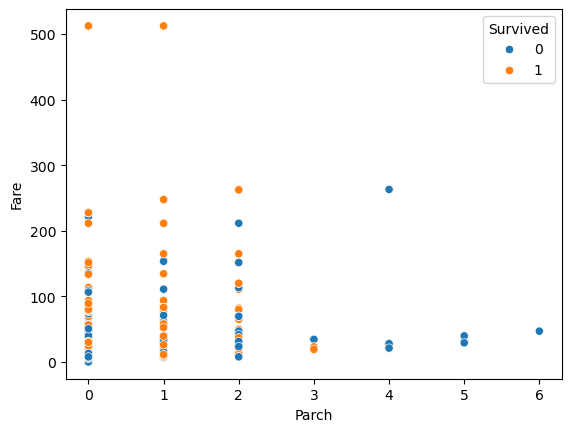

In [48]:
# relation between Parch,fare and survive
sns.scatterplot(data=df2,x='Parch',y='Fare',hue='Survived')

In [55]:
# How many for each Gender
df[df['Sex'] == 'male']['Sex'].count()

577

In [56]:
df[df['Sex'] == 'female']['Sex'].count()

314

<Axes: xlabel='Sex', ylabel='count'>

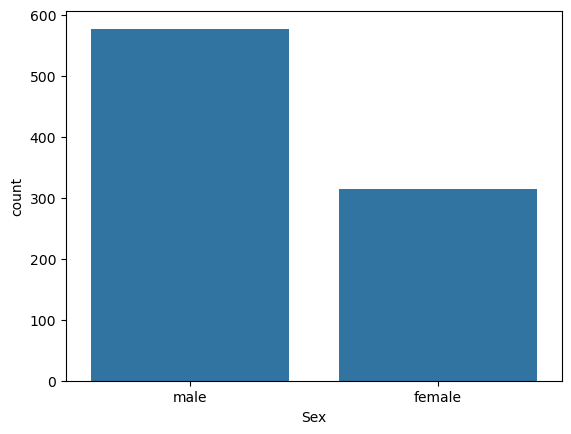

In [61]:
# let's get the Gender countplot
sns.countplot(x= df2['Sex'])

In [62]:
# avg age for each gender 
df2[df2['Sex'] == 'male']['Age'].mean()

30.505824243042102

In [63]:
df2[df2['Sex'] == 'female']['Age'].mean()

28.21673004870738

In [66]:
# gender's effects on the Fare
df2[df2['Sex'] == 'male']['Fare'].mean()

25.523893414211443

In [67]:
df2[df2['Sex'] == 'female']['Fare'].mean()

44.47981783439491

<Axes: xlabel='Sex', ylabel='Fare'>

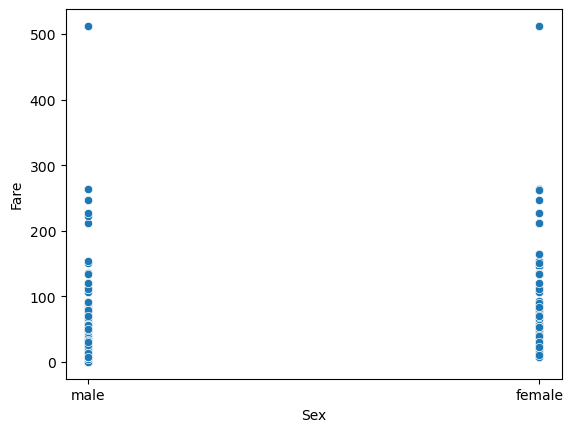

In [68]:
sns.scatterplot(data=df2,x= 'Sex',y= 'Fare')

<Axes: xlabel='Sex', ylabel='count'>

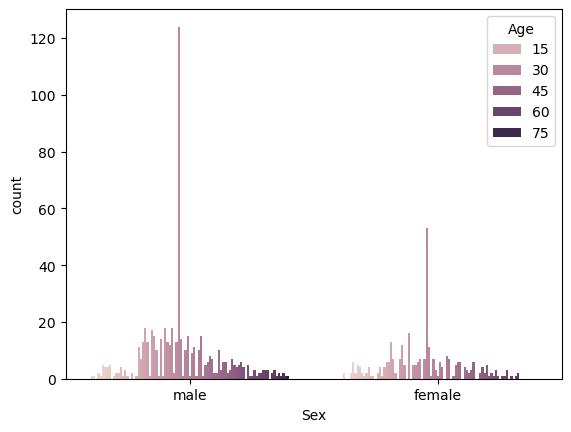

In [69]:
sns.countplot(x= df2['Sex'],hue= df2['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

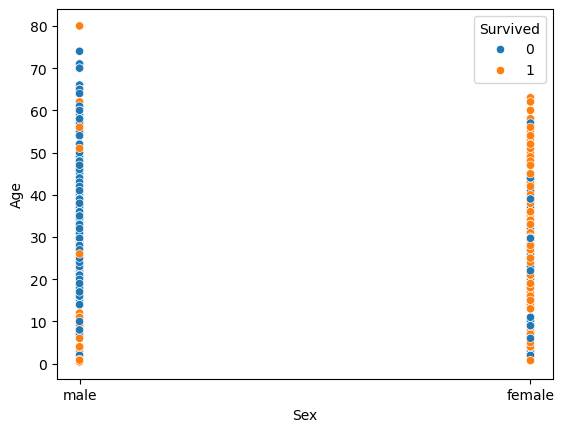

In [70]:
sns.scatterplot(data=df2 , x= 'Sex',y= 'Age',hue='Survived')

In [71]:
df2[df2['Sex'] == 'female']['Fare'].mean()

44.47981783439491

<Axes: xlabel='Sex', ylabel='Fare'>

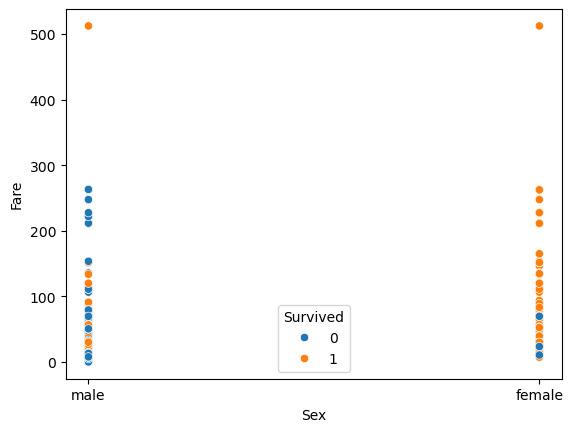

In [73]:
sns.scatterplot(data=df2 , x= 'Sex',y= 'Fare',hue='Survived')

In [76]:
for i,j in [('male',1),('male',0),('female',1),('female',0)]:
    if i == 'male':
        print(f"the_Gender:{i}, survivng_state:{j} n_p:{round((df2[(df2['Sex'] == i) & (df2['Survived'] == j)].shape[0] /577 )* 100)}%")
    else:
        print(f"the_Gender:{i}, survivng_state:{j} n_p:{round((df2[(df2['Sex'] == i) & (df2['Survived'] == j)].shape[0] /314 )* 100)}%")


the_Gender:male, survivng_state:1 n_p:19%
the_Gender:male, survivng_state:0 n_p:81%
the_Gender:female, survivng_state:1 n_p:74%
the_Gender:female, survivng_state:0 n_p:26%


<Axes: xlabel='Sex', ylabel='count'>

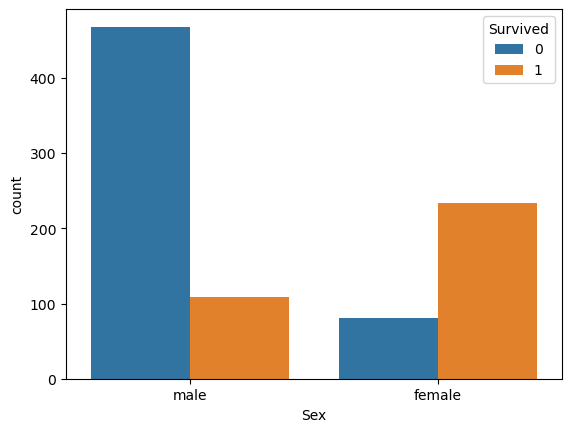

In [78]:
sns.countplot(data=df2, x='Sex',hue= 'Survived')

In [80]:
# which gender has more family members
df2.loc[(df2['Sex'] == 'male') & (df2['Parch'] != 0 | (df2['SibSp'] != 0))].shape[0]

122

In [82]:
df2.loc[(df2['Sex'] == 'female') & (df2['Parch'] != 0 | (df2['SibSp'] != 0))].shape[0]

152

<Axes: xlabel='Sex', ylabel='count'>

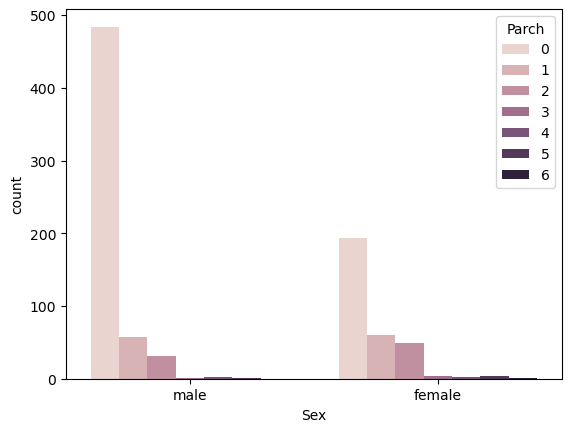

In [84]:
sns.countplot(data=df2,x='Sex',hue='Parch')

<Axes: xlabel='Sex', ylabel='count'>

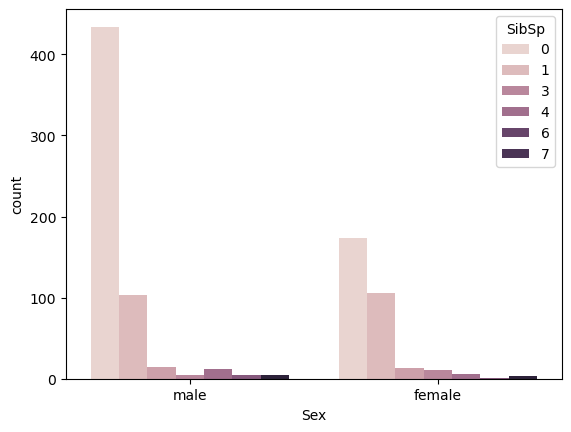

In [85]:
sns.countplot(data=df2,x='Sex',hue='SibSp')

In [86]:
# avg Age
df2['Age'].mean()

29.69911764705882

<Axes: xlabel='Age', ylabel='Count'>

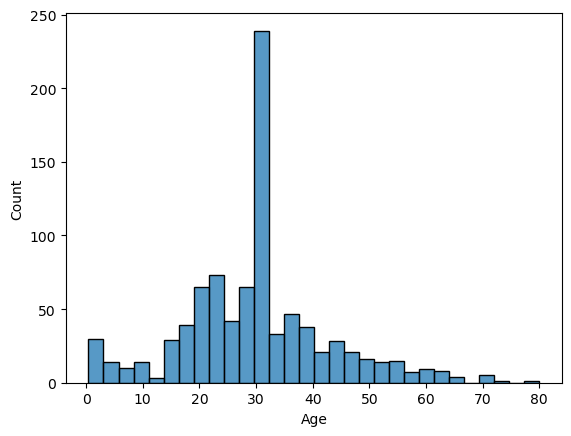

In [87]:
sns.histplot(df2['Age'])

In [88]:
# avg Fare
df2['Fare'].mean()

32.204207968574636

<Axes: xlabel='Fare', ylabel='Count'>

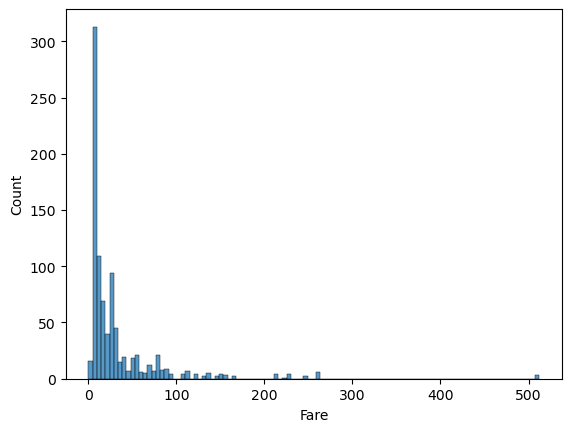

In [90]:
sns.histplot(df2['Fare'])

<Axes: xlabel='Age', ylabel='Fare'>

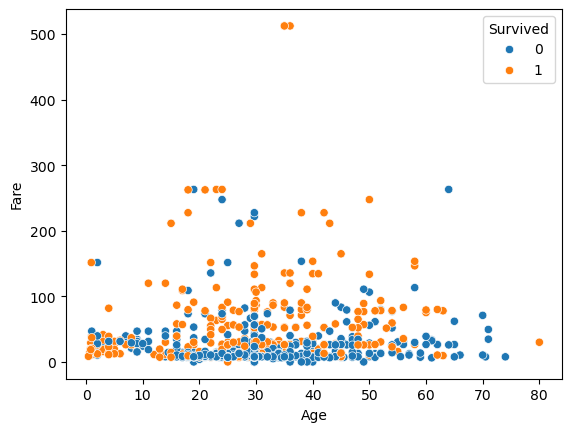

In [91]:
sns.scatterplot(data=df2 , x= 'Age',y= 'Fare',hue='Survived')

In [92]:
nick_uniqe = list(df2['Nickname'].unique())
counter = 0
n_nicknames = []
for i in nick_uniqe:
    for j in list(df2['Nickname']):
        if j == i:
            counter += 1
        else:
            pass
    n_nicknames.append(int(counter))
    counter = 0
nick_uniqe

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Planke',
 'Don',
 'Rev',
 'Billiard',
 'de',
 'Walle',
 'Dr',
 'Pelsmaeker',
 'Mulder',
 '',
 'Steen',
 'Carlo',
 'Mme',
 'Impe',
 'Ms',
 'Major',
 'Gordon',
 'Messemaeker',
 'Mlle',
 'Col',
 'Capt',
 'Velde',
 'th',
 'Shawah',
 'Jonkheer',
 'Melkebeke',
 'Cruyssen']

In [95]:
for i,j in zip(nick_uniqe,n_nicknames):
    print(tuple((i,j,f"{round((j/891)*100)}%")))

('Mr', 502, '56%')
('Mrs', 121, '14%')
('Miss', 179, '20%')
('Master', 40, '4%')
('Planke', 3, '0%')
('Don', 1, '0%')
('Rev', 6, '1%')
('Billiard', 1, '0%')
('de', 1, '0%')
('Walle', 1, '0%')
('Dr', 7, '1%')
('Pelsmaeker', 1, '0%')
('Mulder', 1, '0%')
('', 4, '0%')
('Steen', 1, '0%')
('Carlo', 1, '0%')
('Mme', 1, '0%')
('Impe', 3, '0%')
('Ms', 1, '0%')
('Major', 2, '0%')
('Gordon', 2, '0%')
('Messemaeker', 1, '0%')
('Mlle', 2, '0%')
('Col', 2, '0%')
('Capt', 1, '0%')
('Velde', 1, '0%')
('th', 1, '0%')
('Shawah', 1, '0%')
('Jonkheer', 1, '0%')
('Melkebeke', 1, '0%')
('Cruyssen', 1, '0%')


<Axes: xlabel='Survived', ylabel='count'>

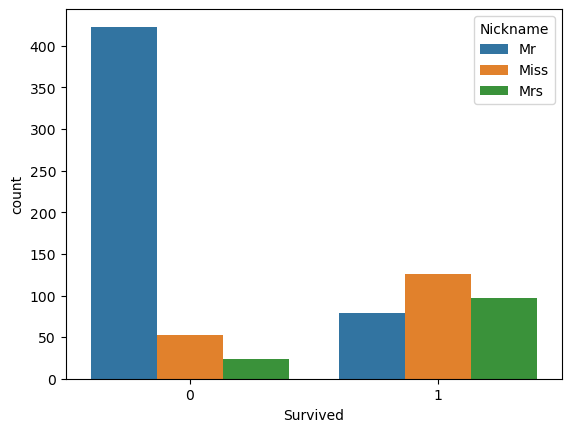

In [96]:
# is the Nickname has any effect on the Chance of survival
flirted = df2[df2['Nickname'].isin(['Mr','Mrs','Miss'])]
sns.countplot(x ='Survived',hue='Nickname',data= flirted)

In [97]:
# how many from Every town 
df2['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [100]:
# let's find the mode of embarked column
df2['Embarked'].mode()
df2['Embarked'].mode()[0]

'S'

<Axes: xlabel='Embarked', ylabel='count'>

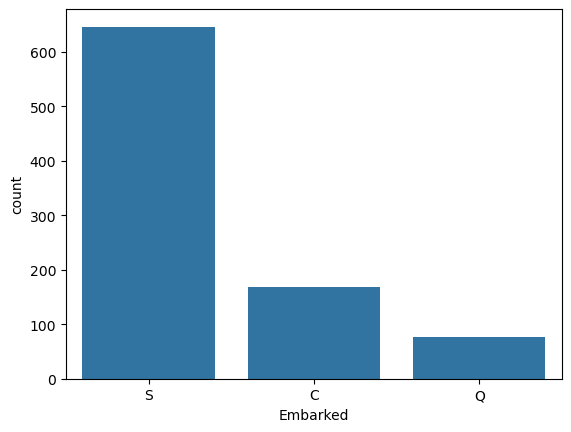

In [102]:
# how many from every town
sns.countplot(data=df2,x='Embarked')

In [105]:
df2.loc[df2['Survived']==1,'Embarked'].value_counts()

Embarked
S    219
C     93
Q     30
Name: count, dtype: int64

In [106]:
df2.loc[df2['Survived']==0,'Embarked'].value_counts()

Embarked
S    427
C     75
Q     47
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

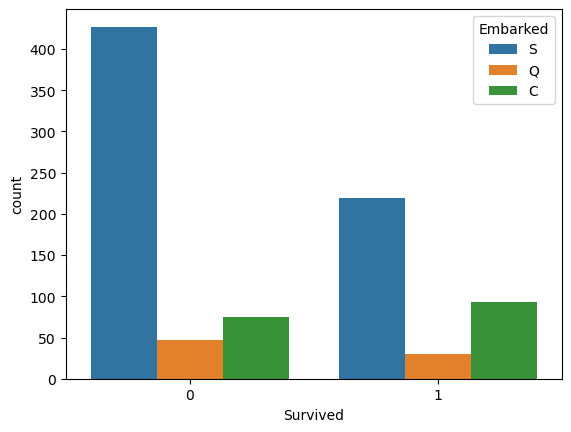

In [108]:
# how many survivors from each one
sns.countplot(data= df2, x='Survived',hue='Embarked')

<Axes: xlabel='Embarked', ylabel='count'>

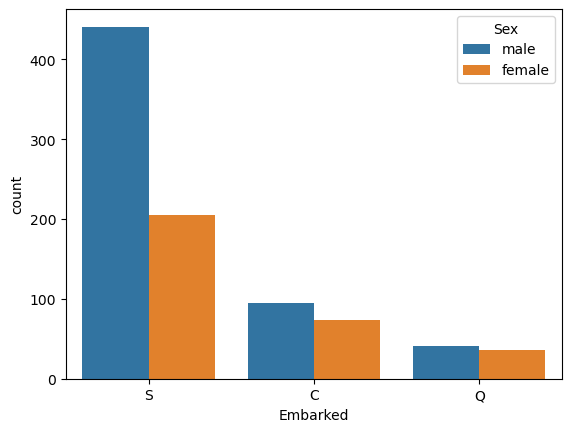

In [109]:
sns.countplot(data= df2,x='Embarked',hue= 'Sex')

<Axes: xlabel='Embarked', ylabel='Fare'>

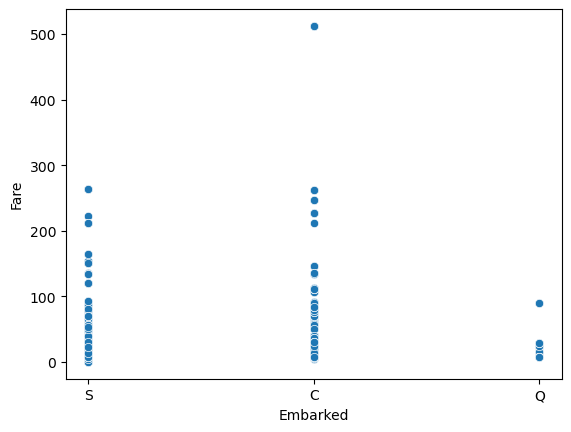

In [110]:
# which Embarked has more fare
sns.scatterplot(data=df2, x="Embarked",y ='Fare')

<Axes: >

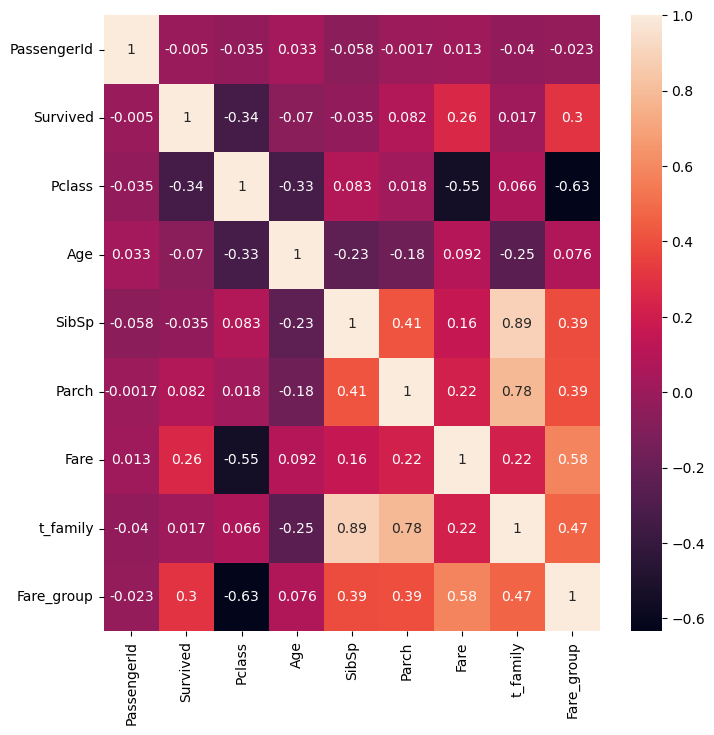

In [111]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(numeric_only=True),annot=True)

In [112]:
df2 = df2.join(pd.get_dummies(df2.Embarked,dtype=int))
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Nickname,Age_stage,t_family,Fare_group,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,Adult,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,Adult,1,3,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,Adult,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,Adult,1,3,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,Adult,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev,Adult,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss,Adult,0,2,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Miss,Adult,3,2,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr,Adult,0,2,1,0,0


In [113]:
df2 = df2.join(pd.get_dummies(df2['Nickname'],dtype=int))
df2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Mulder,Pelsmaeker,Planke,Rev,Shawah,Steen,Velde,Walle,de,th
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,0,0,0,1,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,0,0,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df2 = df2.join(pd.get_dummies(df2['Sex'],dtype=int))
df2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Planke,Rev,Shawah,Steen,Velde,Walle,de,th,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,0,1,0,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,0,0,0,0,0,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,0,0,0,0,0,0,0,0,0,1


In [115]:
df2 = df2.join(pd.get_dummies(df2['Age_stage'],dtype=int))
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Steen,Velde,Walle,de,th,female,male,Adult,old,young
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,0,0,0,0,0,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,0,0,0,0,0,0,1,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,0,0,0,0,0,1,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,1,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,0,0,0,0,0,0,1,1,0,0


In [116]:
L_model = LogisticRegression()

In [117]:
x = df2[['Pclass','Age','SibSp','Parch','Fare','female','male','C','Q','S']]
x.count()

Pclass    891
Age       891
SibSp     891
Parch     891
Fare      891
female    891
male      891
C         891
Q         891
S         891
dtype: int64

In [118]:
y = df2['Survived']
len(y)

891

In [119]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=2)

In [121]:
print(f'n_rows_x{len(x_train)}, n_rows_y{len(y_train)}')

n_rows_x178, n_rows_y178


In [122]:
S_Scaler = StandardScaler()
x_train_Scaled = S_Scaler.fit_transform(x_train)
x_test_Scaled = S_Scaler.transform(x_test)

In [124]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [125]:
model_1 = LogisticRegression()

In [126]:
model_1.fit(x_train_Scaled,y_train)

LogisticRegression()

In [129]:
model_1.fit(x_train_scaled,y_train)

LogisticRegression()

In [130]:
prediction = model_1.predict(x_test_Scaled)
accuracy = accuracy_score(y_test,prediction)
print(f"accuracy is: {accuracy}")

accuracy is: 0.7461430575035063


In [131]:
prediction = model_1.predict(x_test_scaled)
accuracy = accuracy_score(y_test,prediction)
print(f"accuracy is: {accuracy}")

accuracy is: 0.7741935483870968


In [132]:
model_3 = LogisticRegression(max_iter=1000)
pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('model_3',model_3)
])

In [133]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model_3__C': [0.001,0.1, 1, 10,100],                # Regularization strength
    'model_3__penalty': ['l2','l1'],                 # Regularization type
    'model_3__solver': ['saga','liblinear'],
    'model_3__random_state' : [1,46545] # Optimization algorithm
}

grid = GridSearchCV(pipeline, param_grid, cv=66, scoring='accuracy', n_jobs=-1)

grid.fit(x_train_Scaled,y_train)

print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Parameters: {'model_3__C': 0.1, 'model_3__penalty': 'l2', 'model_3__random_state': 1, 'model_3__solver': 'saga'}
Best Estimator: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model_3',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=1,
                                    solver='saga'))])
Best Cross-Validation Score: 0.8055555555555555


In [135]:
model_deployment = LogisticRegression()
model_deployment.fit(x_train_Scaled,y_train)

LogisticRegression()

In [137]:
pre = model_deployment.predict(x_test_Scaled)
acc = accuracy_score(y_test,pre)
acc

0.7769985974754559

In [138]:
random_forest = RandomForestClassifier(n_estimators=400)

random_forest.fit(x_train,y_train)

predict10 = random_forest.predict(x_test)

acc = accuracy_score(y_test,predict10)

print(acc)

0.7854137447405329


In [139]:
pipeline = Pipeline([
    ('random_f',RandomForestClassifier(random_state=42))
])

pipeline.fit(x_train,y_train)

predit = pipeline.predict(x_test)

acc = accuracy_score(y_test,predit)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.78


In [141]:
param_grid = {
    'random_f__n_estimators': [400,100,200,300],
    'random_f__min_samples_split': [2,3,4,5,6,10],
    'random_f__min_samples_leaf': [1,2,4,5],
    'random_f__max_depth': [None,10,20,40,50]
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy',n_jobs=-1,verbose=1,cv=5)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Parameters: {'random_f__max_depth': None, 'random_f__min_samples_leaf': 2, 'random_f__min_samples_split': 5, 'random_f__n_estimators': 100}
Best Accuracy: 0.8101587301587301


In [145]:
import pickle 
filename = 'survivng_prediction_3.sav'
pickle.dump(model_deployment,open(filename,'wb'))